# this is project 1 code for analysing heart disease dataset from Kaggle
## dataset from https://www.kaggle.com/ronitf/heart-disease-uci

This Python 3 environment comes with many helpful analytics libraries installed




In [1]:
## import some helpful analytics libraries installed 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# input the dataset
heart_dis = pd.read_csv('/Users/fuqinwei/Desktop/heart.csv')

dataset information:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
# data preview
heart_dis.shape



(303, 14)

In [4]:
heart_dis.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
heart_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Data cleaning

### check if any null value in data

In [6]:
null = heart_dis.isnull()
null.sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

    there is no null value in this data through the output, then check if any outlier in data.

In [7]:
hd = heart_dis.copy()

## check if any outlier in data
plot boxplot to check whether there are any outliers in any columns

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

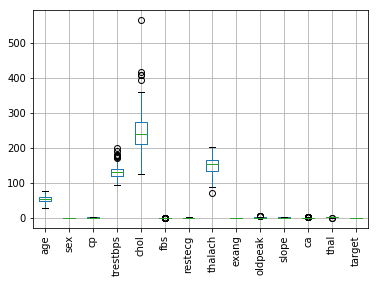

In [8]:
hd.boxplot()
plt.xticks(rotation = 90)

    some attribues seem to have worst outliers, such as trestbps (resting blood pressure), 
    chol (serum cholestoral). let's see how these attribues affect risk of heart disease (target).

<function matplotlib.pyplot.show(*args, **kw)>

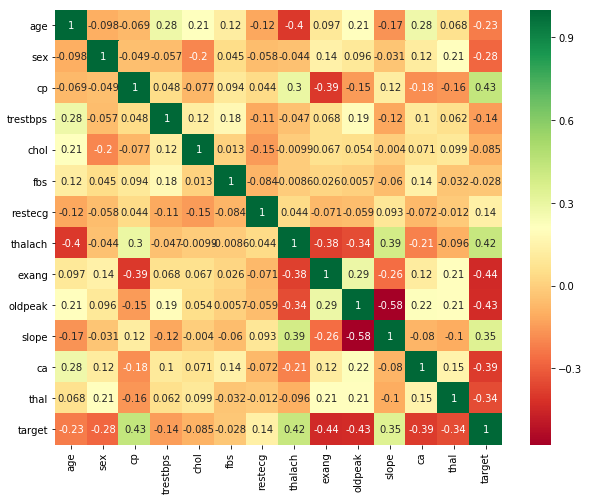

In [9]:
# Correlation tes
sns.heatmap(hd.corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

In [10]:
# Corelation with target
x = hd.corr()
pd.DataFrame(x['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'Greens')

,target
target,1
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.13723
fbs,-0.0280458
chol,-0.0852391
trestbps,-0.144931
age,-0.225439
sex,-0.280937


we can see these attributes: cp(chest pain), thalach(resting electrocardiographic results), slop(the slop of the peak exercise ST segment), thal, ca(number of major vessels), oldpeak, exang(exercise induced angina) can affect target.

#### Let's remove outliers.

* Outliers are those which are in (Q1 - 1.5 IQR ) and (Q3 + 1.5 IQR).
* where IQR is Inter Quartile Range (Q3 - Q1), where Q1 is 25%ile and Q3 is 75percintile

### trestbps(resting blood pressure)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1878a780>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1878ae10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1878a358>],
 'medians': [<matplotlib.lines.Line2D at 0x1a187924e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a18792828>],
 'means': []}

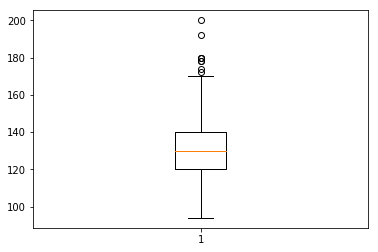

In [11]:
plt.boxplot(hd.trestbps)

In [12]:
Q3 = hd.trestbps.quantile(.75)
Q1 = hd.trestbps.quantile(.25)
IQR = Q3 - Q1
hd = hd[~((hd.trestbps < Q1 - 1.5*IQR) | (hd.trestbps > Q3 + 1.5*IQR))]

### chol(serum cholestoral)

In [13]:
Q3 = hd.chol.quantile(.75)
Q1 = hd.chol.quantile(.25)
IQR = Q3 - Q1
hd = hd[~((hd.chol < Q1 - 1.5*IQR) | (hd.chol > Q3 + 1.5*IQR))]

### thalach(maximum heart rate achieved)

In [14]:
Q3 = hd.thalach.quantile(.75)
Q1 = hd.thalach.quantile(.25)
IQR = Q3 - Q1
hd = hd[~((hd.thalach < Q1 - 1.5*IQR) | (hd.thalach > Q3 + 1.5*IQR))]

    now review whether any outliers in data

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

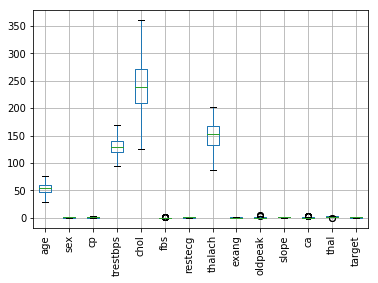

In [15]:
hd.boxplot()
plt.xticks(rotation = 90)

     now dataset is clear!

In [16]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 302
Data columns (total 14 columns):
age         288 non-null int64
sex         288 non-null int64
cp          288 non-null int64
trestbps    288 non-null int64
chol        288 non-null int64
fbs         288 non-null int64
restecg     288 non-null int64
thalach     288 non-null int64
exang       288 non-null int64
oldpeak     288 non-null float64
slope       288 non-null int64
ca          288 non-null int64
thal        288 non-null int64
target      288 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.8 KB


# Data analysis

In [17]:
# means sumary of each attributes 
hd.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.333333,0.860465,0.488372,132.085271,247.658915,0.147287,0.441860,138.899225,0.542636,1.565116,1.178295,1.170543,2.534884
1,52.157233,0.572327,1.371069,128.364780,237.729560,0.132075,0.603774,158.566038,0.138365,0.552830,1.603774,0.371069,2.106918


### let's find some insights

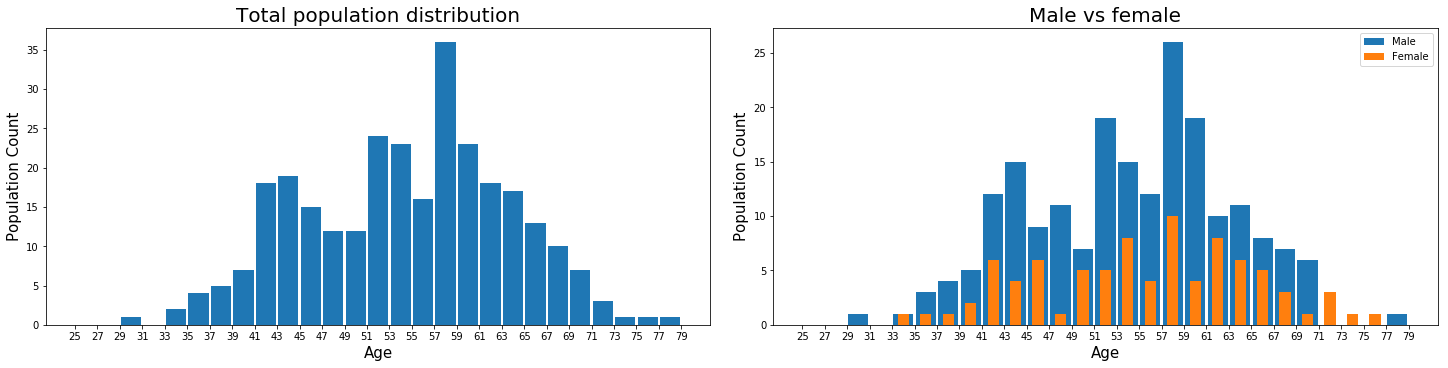

In [18]:
# Population Distribution with age and sex

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5),constrained_layout=True)
bin_x = range(25,80,2)

ax1.hist(hd.age.tolist(),bins=bin_x,rwidth=0.9)
ax1.set_xticks(range(25,80,2))
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Population Count',fontsize=15)
ax1.set_title('Total population distribution',fontsize=20)

ax2.hist(hd[hd['sex']==1].age.tolist(),label = 'Male',bins=bin_x,rwidth=0.9)
ax2.hist(hd[hd['sex']==0].age.tolist(),label = 'Female',bins=bin_x,rwidth=0.5)
ax2.legend()
ax2.set_xticks(range(25,80,2))
ax2.set_xlabel('Age',fontsize=15)
ax2.set_ylabel('Population Count',fontsize=15)
ax2.set_title('Male vs female',fontsize=20)

plt.show()

Text(0.5, 1.0, '% of people with no heart disease by age')

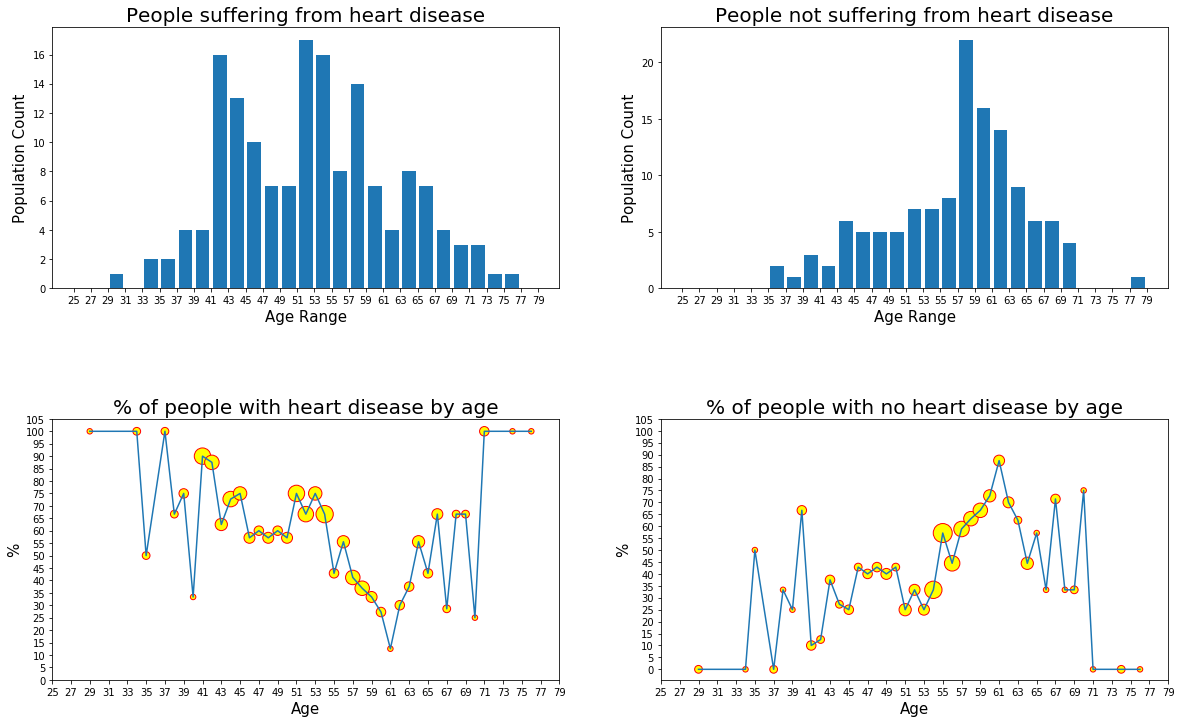

In [19]:
# Population distribution for heart disease
x = hd.groupby(['age','target']).agg({'sex':'count'})
y = hd.groupby(['age']).agg({'sex':'count'})
z = (x.div(y, level='age') * 100)
q= 100 - z

fig, axes = plt.subplots(2,2, figsize = (20,12))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].hist(hd[hd['target']==1].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age Range',fontsize=15)
axes[0,0].set_ylabel('Population Count',fontsize=15)
axes[0,0].set_title('People suffering from heart disease',fontsize=20)

axes[0,1].hist(hd[hd['target']==0].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age Range',fontsize=15)
axes[0,1].set_ylabel('Population Count',fontsize=15)
axes[0,1].set_title('People not suffering from heart disease',fontsize=20)

axes[1,0].scatter(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,0].plot(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_yticks(range(0,110,5))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('%',fontsize=15)
axes[1,0].set_title('% of people with heart disease by age',fontsize=20)

axes[1,1].scatter(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex,s=(x.xs(0,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,1].plot(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_yticks(range(0,110,5))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('%',fontsize=15)
axes[1,1].set_title('% of people with no heart disease by age',fontsize=20)



In [20]:
# Find insights group by age, sex and target
# Before that, let's generalize the Age attribute to Age-group
x = hd.age.tolist()
after_x = []
for i in x:
    if i < 20:
        after_x.append("teenager")
    elif i < 30:
        after_x.append("20 - 30")
    elif i < 40:
        after_x.append("30 - 40")
    elif i < 50:
        after_x.append("40 - 50")
    elif i < 60:
        after_x.append("50 - 60")
    else:
        after_x.append("senior")

hd["age_category"] = after_x

for_analyzing = hd.groupby(["age_category","sex","target"]).\
agg({"age":"mean", "trestbps":"mean", "chol":"mean", "thalach":"mean",\
     "exang":"mean","oldpeak":"mean", "slope":"mean","fbs" : pd.Series.mode,\
     "cp" : pd.Series.mode, "restecg": pd.Series.mode,"ca":pd.Series.mode,"thal":pd.Series.mode})
for_analyzing

age    trestbps        chol     thalach  \
age_category sex target                                                  
20 - 30      1   1       29.000000  130.000000  204.000000  202.000000   
30 - 40      0   1       36.800000  121.600000  205.400000  175.000000   
             1   0       36.750000  121.000000  232.500000  152.000000   
                 1       36.833333  131.000000  215.833333  177.166667   
40 - 50      0   0       43.000000  132.000000  341.000000  136.000000   
                 1       44.333333  122.333333  228.611111  159.555556   
             1   0       45.000000  123.047619  235.000000  144.000000   
                 1       43.937500  125.125000  237.187500  169.906250   
50 - 60      0   0       56.000000  139.000000  255.166667  144.500000   
                 1       54.000000  128.000000  265.458333  155.000000   
             1   0       55.775510  133.612245  248.081633  135.795918   
                 1       54.435897  128.230769  226.794872  159.410256   
senior       0   0       62.090909  138.636364  256.272727  141.181818   
                 1       66.285714  133.904762  251.095238  142.619048   
             1   0       64.324324  133.324324  249.621622  137.189189   
                 1       64.923077  138.076923  236.846154  140.846154   

                            exang   oldpeak     slope  fbs      cp  restecg  \
age_category sex target                                                       
20 - 30      1   1       0.000000  0.000000  2.000000    0       1        0   
30 - 40      0   1       0.000000  0.420000  1.800000    0       2        1   
             1   0       0.750000  1.650000  1.250000    0       0        1   
                 1       0.000000  0.583333  1.666667    0       2        1   
40 - 50      0   0       1.000000  3.000000  1.000000    1       0        0   
                 1       0.222222  0.305556  1.333333    0  [1, 2]        1   
             1   0       0.428571  1.042857  1.285714    0       0        0   
                 1       0.093750  0.434375  1.781250    0  [1, 2]        1   
50 - 60      0   0       0.666667  1.033333  1.166667    0       0        0   
                 1       0.083333  0.604167  1.666667    0       2        0   
             1   0       0.571429  1.555102  1.163265    0       0        0   
                 1       0.230769  0.571795  1.564103    0       2        1   
senior       0   0       0.363636  1.881818  0.909091    0       0        0   
                 1       0.047619  0.676190  1.666667    0       2        1   
             1   0       0.567568  1.818919  1.216216    0       0        0   
                 1       0.230769  0.915385  1.307692    0  [0, 3]        0   

                                ca  thal  
age_category sex target                   
20 - 30      1   1               0     2  
30 - 40      0   1               0     2  
             1   0               0     3  
                 1               0     2  
40 - 50      0   0               0     3  
                 1               0     2  
             1   0               0     3  
                 1               0     2  
50 - 60      0   0       [0, 1, 2]     3  
                 1               0     2  
             1   0               1     3  
                 1               0     2  
senior       0   0               0     2  
                 1               0     2  
             1   0          [1, 2]     3  
                 1               0     2

In [21]:
for_analyzing_IgnoreSex = hd.groupby(["age_category","target"]).\
agg({"age":"mean", "trestbps":"mean", "chol":"mean", "thalach":"mean",\
     "exang":"mean","oldpeak":"mean", "slope":"mean","fbs" : pd.Series.mode,\
     "cp" : pd.Series.mode, "restecg": pd.Series.mode,"ca":pd.Series.mode,"thal":pd.Series.mode})
for_analyzing_IgnoreSex.trestbps


age_category  target
20 - 30       1         130.000000
30 - 40       0         121.000000
              1         126.727273
40 - 50       0         123.454545
              1         124.120000
50 - 60       0         134.200000
              1         128.142857
senior        0         134.541667
              1         135.500000
Name: trestbps, dtype: float64

In [22]:
for_analyzing_IgnoreSex.chol

age_category  target
20 - 30       1         204.000000
30 - 40       0         232.500000
              1         211.090909
40 - 50       0         239.818182
              1         234.100000
50 - 60       0         248.854545
              1         241.523810
senior        0         251.145833
              1         245.647059
Name: chol, dtype: float64

#### chol value is less for Heart Disease victims

In [23]:
for_analyzing_IgnoreSex.thalach

age_category  target
20 - 30       1         202.000000
30 - 40       0         152.000000
              1         176.181818
40 - 50       0         143.636364
              1         166.180000
50 - 60       0         136.745455
              1         157.730159
senior        0         138.104167
              1         141.941176
Name: thalach, dtype: float64

#### thalach value is more for Heart Disease victims

In [24]:
for_analyzing_IgnoreSex.exang

age_category  target
20 - 30       1         0.000000
30 - 40       0         0.750000
              1         0.000000
40 - 50       0         0.454545
              1         0.140000
50 - 60       0         0.581818
              1         0.174603
senior        0         0.520833
              1         0.117647
Name: exang, dtype: float64

#### exang value is less for Heart Disease victims

In [25]:
for_analyzing_IgnoreSex.oldpeak

age_category  target
20 - 30       1         0.000000
30 - 40       0         1.650000
              1         0.509091
40 - 50       0         1.131818
              1         0.388000
50 - 60       0         1.498182
              1         0.584127
senior        0         1.833333
              1         0.767647
Name: oldpeak, dtype: float64

#### oldpeak value is less for Heart Disease victims¶

In [26]:
for_analyzing_IgnoreSex.slope

age_category  target
20 - 30       1         2.000000
30 - 40       0         1.250000
              1         1.727273
40 - 50       0         1.272727
              1         1.620000
50 - 60       0         1.163636
              1         1.603175
senior        0         1.145833
              1         1.529412
Name: slope, dtype: float64

#### slope value is less for Heart Disease victims¶

In [27]:
for_analyzing_IgnoreSex.fbs

age_category  target
20 - 30       1         0
30 - 40       0         0
              1         0
40 - 50       0         0
              1         0
50 - 60       0         0
              1         0
senior        0         0
              1         0
Name: fbs, dtype: int64

In [28]:
for_analyzing_IgnoreSex.cp

age_category  target
20 - 30       1              1
30 - 40       0              0
              1              2
40 - 50       0              0
              1         [1, 2]
50 - 60       0              0
              1              2
senior        0              0
              1              2
Name: cp, dtype: object

In [29]:
for_analyzing_IgnoreSex.restecg

age_category  target
20 - 30       1         0
30 - 40       0         1
              1         1
40 - 50       0         0
              1         1
50 - 60       0         0
              1         1
senior        0         0
              1         1
Name: restecg, dtype: int64

In [30]:
for_analyzing_IgnoreSex.ca

age_category  target
20 - 30       1         0
30 - 40       0         0
              1         0
40 - 50       0         0
              1         0
50 - 60       0         1
              1         0
senior        0         2
              1         0
Name: ca, dtype: int64

In [31]:
for_analyzing_IgnoreSex.thal

age_category  target
20 - 30       1         2
30 - 40       0         3
              1         2
40 - 50       0         3
              1         2
50 - 60       0         3
              1         2
senior        0         3
              1         2
Name: thal, dtype: int64

In [38]:
for_analyzing_category = hd.groupby(["age_category","target"]).\
agg({"cp" : pd.Series.mode, "ca":pd.Series.mode,"thal":pd.Series.mode})
for_analyzing_category

cp  ca  thal
age_category target                  
20 - 30      1            1   0     2
30 - 40      0            0   0     3
             1            2   0     2
40 - 50      0            0   0     3
             1       [1, 2]   0     2
50 - 60      0            0   1     3
             1            2   0     2
senior       0            0   2     3
             1            2   0     2

* Each and every Age Group has , mode, "thal" - type - 2 for Heart Disease victims irrespective of GENDER
* Each and every Age Group has , mode, "ca" - type - 0 for Heart Disease victims irrespective of GENDER
* Each and every Age Group has , mode, "cp" - type - 0 for NON - Heart Disease victims irrespective of GENDER

In [32]:
heart_data = hd.copy()

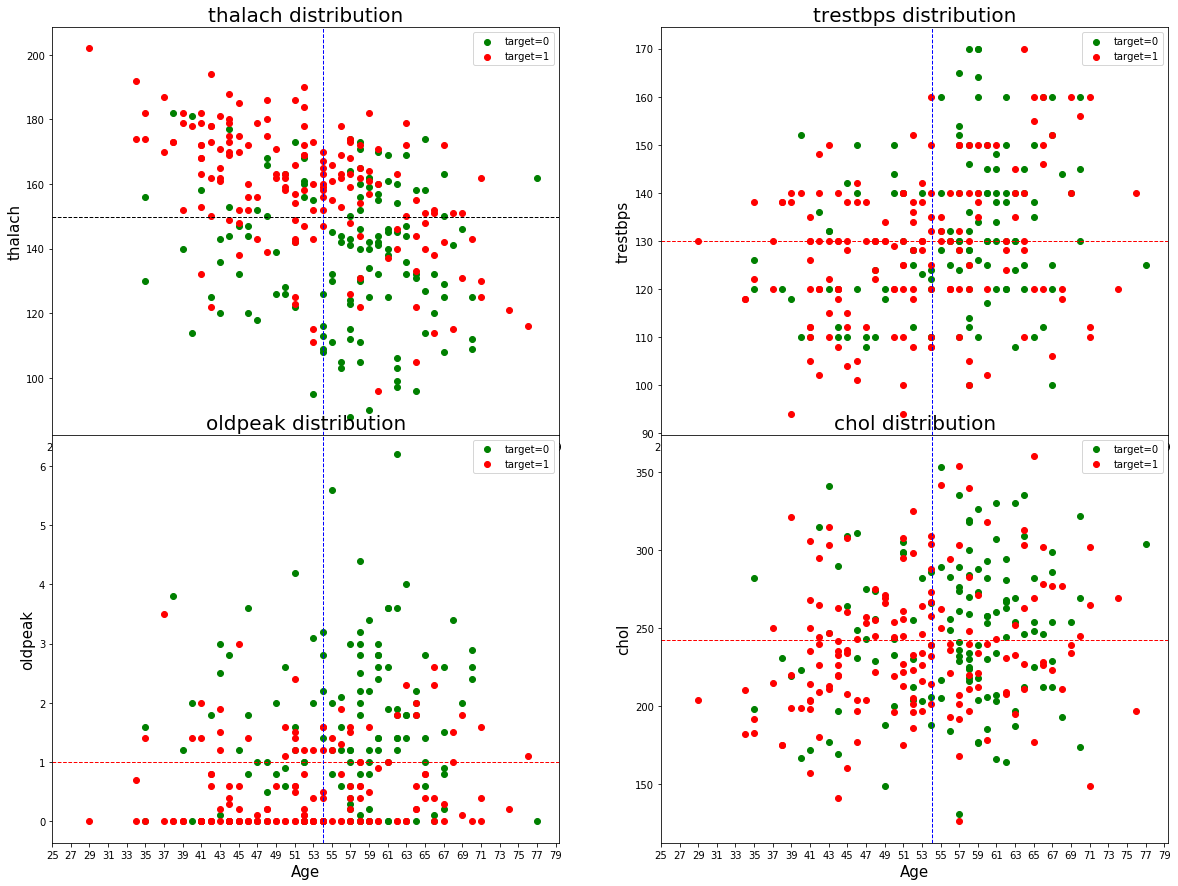

In [42]:
fig, axes = plt.subplots(2,2, figsize = (20,15))
plt.subplots_adjust(hspace = 0)

axes[0,0].scatter(heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).thalach, c = 'g',label = 'target=0')
axes[0,0].scatter(heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).thalach, c = 'r',label = 'target=1')
axes[0,0].set_title('thalach distribution',fontsize=20)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age',fontsize=15)
axes[0,0].set_ylabel('thalach',fontsize=15)
axes[0,0].axhline(np.mean(heart_data['thalach']),xmin=0,xmax=1,linewidth=1, color='black',linestyle = '--')
axes[0,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0,0].legend()

axes[0,1].scatter(heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'g',label = 'target=0')
axes[0,1].scatter(heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'r',label = 'target=1')
axes[0,1].set_title('trestbps distribution',fontsize=20)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age',fontsize=15)
axes[0,1].set_ylabel('trestbps',fontsize=15)
axes[0,1].axhline(np.mean(heart_data['trestbps']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[0,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0,1].legend()

# heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age'])
axes[1,1].scatter(heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).chol,c = 'g',label = 'target=0')
axes[1,1].scatter(heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).chol,c = 'r',label = 'target=1')
axes[1,1].set_title('chol distribution',fontsize=20)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('chol',fontsize=15)
axes[1,1].axhline(np.mean(heart_data['chol']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[1,1].legend()

axes[1,0].scatter(heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'g',label = 'target=0')
axes[1,0].scatter(heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'r',label = 'target=1')
axes[1,0].set_title('oldpeak distribution',fontsize=20)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('oldpeak',fontsize=15)
axes[1,0].axhline(np.mean(heart_data['oldpeak']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[1,0].legend()


plt.show()